In [1]:
import pandas as pd
pd.read_csv('../input/traffic-signs-classification/labels.csv')

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


#   

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [3]:
dir_path = '../input/gtsrb-german-traffic-sign'

In [4]:
os.listdir(dir_path)

['Test',
 'Train',
 'Test.csv',
 'Meta',
 'train',
 'Meta.csv',
 'meta',
 'test',
 'Train.csv']

In [5]:
train_path = dir_path +'/Train'
test_path = dir_path + '/Test'

In [6]:
print(sorted(os.listdir(train_path)))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [7]:
sorted(os.listdir(test_path))

['00000.png',
 '00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '0007

##   

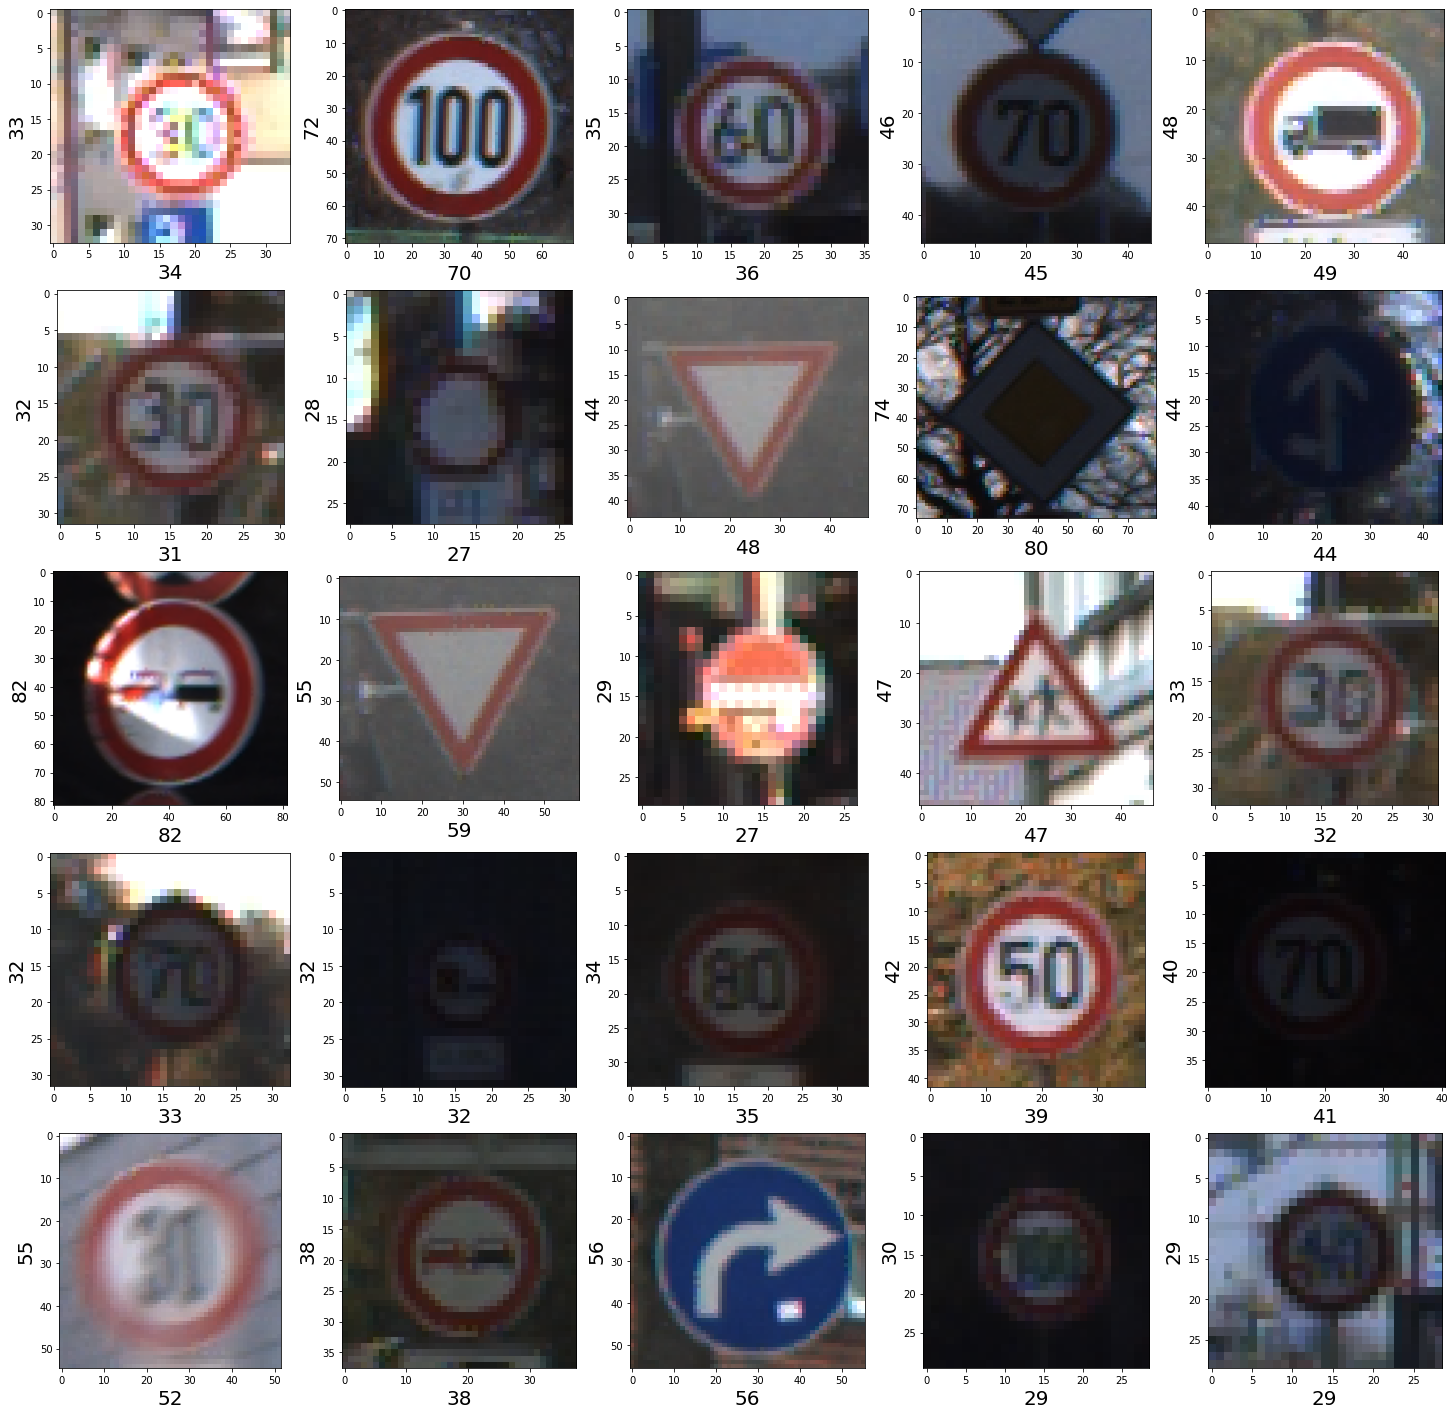

In [8]:
import random

images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))


for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image


In [9]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

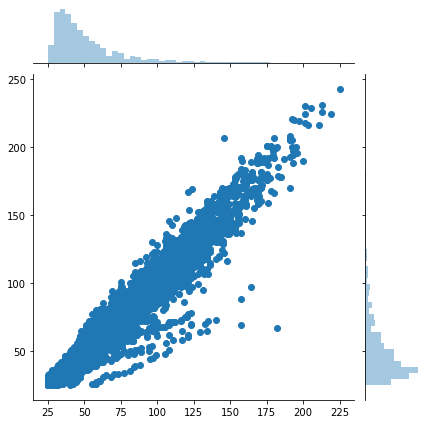

In [10]:
sns.jointplot(dim1,dim2)
plt.show()

In [11]:
np.mean(dim1)

50.328929582493814

In [12]:
np.mean(dim2)

50.83587951745773

In [13]:
image_shape = (50,50)

#  

In [14]:
from PIL import Image

images = []
label_id = []

for i in range(43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [15]:
images = np.array(images)
images = images/255 

In [16]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [17]:
images.shape

(39209, 50, 50, 3)

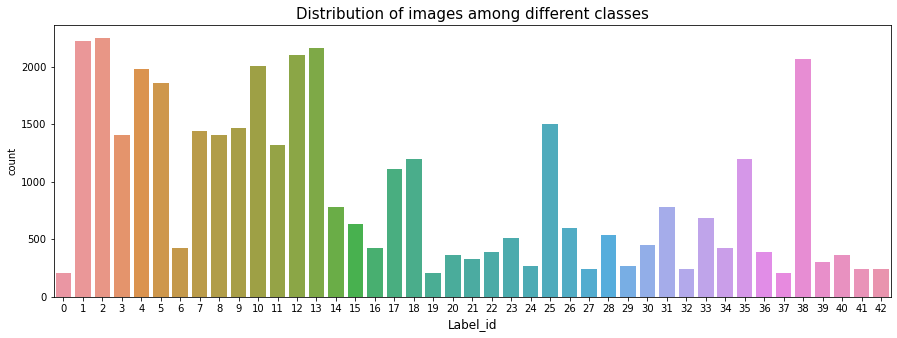

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(label_id)
plt.title('Distribution of images among different classes', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

In [19]:
np.save('Training_set', images)
np.save('Label_Id', label_id)

In [21]:
images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

In [22]:
from sklearn.model_selection import  train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [23]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

#    

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [25]:
model = Sequential()

#1st layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3rd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(43, activation = 'softmax'))

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          3

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    x_train, y_train,
    epochs = 25,
    batch_size = 64,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping],
    verbose = 2
)

Epoch 1/25
491/491 - 117s - loss: 2.7330 - accuracy: 0.2326 - val_loss: 1.6808 - val_accuracy: 0.4898
Epoch 2/25
491/491 - 115s - loss: 1.5535 - accuracy: 0.4961 - val_loss: 0.9674 - val_accuracy: 0.7286
Epoch 3/25
491/491 - 116s - loss: 0.9934 - accuracy: 0.6702 - val_loss: 0.4195 - val_accuracy: 0.8924
Epoch 4/25
491/491 - 116s - loss: 0.6598 - accuracy: 0.7784 - val_loss: 0.2474 - val_accuracy: 0.9434
Epoch 5/25
491/491 - 116s - loss: 0.5151 - accuracy: 0.8285 - val_loss: 0.1807 - val_accuracy: 0.9649
Epoch 6/25
491/491 - 115s - loss: 0.4313 - accuracy: 0.8583 - val_loss: 0.1540 - val_accuracy: 0.9717
Epoch 7/25
491/491 - 115s - loss: 0.3767 - accuracy: 0.8767 - val_loss: 0.1047 - val_accuracy: 0.9791
Epoch 8/25
491/491 - 116s - loss: 0.3248 - accuracy: 0.8953 - val_loss: 0.0807 - val_accuracy: 0.9821
Epoch 9/25
491/491 - 115s - loss: 0.3078 - accuracy: 0.9018 - val_loss: 0.0778 - val_accuracy: 0.9836
Epoch 10/25
491/491 - 116s - loss: 0.2754 - accuracy: 0.9134 - val_loss: 0.0738 - 

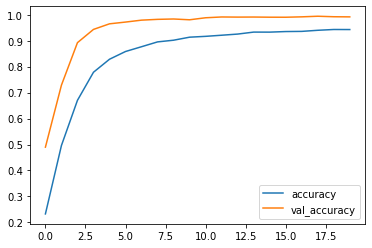

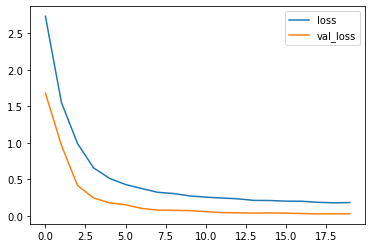

In [29]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

####   